# Analyzing the Effects of Space Flight on Telomere Length Dynamics in NASA Astronauts

In 2024 NASA will execute Project Artemis, sending humans back to the moon to establish a permanent lunar base. However, space is inherently dangerous to human health. As part of my Ph.D, I'm researching how spaceflight impacts human health, and whether these impacts could potentially comprise current (Project Artemis) or future missions, ala Mars and beyond. Specifically, I'm examining how time aboard the International Space Station affects telomeres, the ends of human DNA, and the stability of DNA, for NASA's astronauts. My research takes the *first look at the changes to telomeres in unrelated astronauts as a result of spaceflight*, informing NASA policy and approach for current and future missions.

Let's get started with the analysis!

Please feel free to contact me.

**Contact:**  
Jared Luxton  
jLuxton@colostate.edu  
https://www.linkedin.com/in/jaredjamesluxton/

<table><tr>
<td><img src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/200px-Python-logo-notext.svg.png width="150"> 
<td><img src=https://cdn1.medicalnewstoday.com/content/images/articles/319/319971/space-explorer.jpg width="300">
<td><img src=https://abm-website-assets.s3.amazonaws.com/rdmag.com/s3fs-public/embedded_image/2017/04/telomere-chromosome-stock.jpg width="250">
</tr></table>

&nbsp;
&nbsp;   

## Table of Contents:

* [Background: Health Risks and Obstacles to Space Flight](#background) 
* [Approach: Identifying Risks by Measuring Telomere Lengths](#approach)
* [Methods: Blood Collections, Cell Culture, Telomere Measurements](#methods)
* [Data Cleaning: Handling Telomere Length Data](#data-cleaning)
* [Data Analysis: Visualization and Statistics](#data-analysis)
* [Conclusions](#conclusions)

&nbsp;    

<a id='background'></a>
&nbsp;
## Background 
**Health Risks and Obstacles to Space Flight**   
Did you know that NASA is sending humans to the Moon in 2024? Yes! And not only that: this mission is the first of many that will develop permanent lunar colonies and provide a bridge to exploring Mars and beyond. Dubbed Artemis, this NASA project entails sending the *first* woman (and another man) to the lunar surface and the development of a *permanent lunar outpost called the Gateway* orbiting the Moon. The objectives undertaken by Artemis are part of NASA's overarching goal (and humanity's common dream) for humans to explore our solar system; Mars and beyond. 

The immediate challenges facing Artemis are substantial in terms of technology and health considerations for the astronauts. Even as we approach Project Artemis in 2024, the short- and long-term health effects of spaceflight, especially those from chronic exposure to galactic cosmic rays, a type of radiation unique to space and not found on Earth, remain relatively unknown. 

Galactic cosmic rays (GCRs) are highly energetic particles hurtling through space at nearly the speed of light. Though a rare event, when GCRs strike human cells they shred all cellular contents in their path, including DNA. This damage accumulates over time, and could lead to degeneration of tissues and cancer. Currently, we simply don't understand how much cellular damage humans accumulate in space, and how much it increases cancer risk. Not understanding these issues makes addressing them impossible. My research directly addresses these issues by examing how spaceflight effects telomeres (the ends of DNA) and DNA stability for NASA astronauts aboard the International Space Station.

&nbsp; 




<a id='approach'></a>
&nbsp;
## Approach 
**Identifying Risks by Measuring Telomere Lengths**  
Telomeres are repetitive sequences of DNA covered by protein found at the very ends of DNA. Telomeres shorten with each cell division and thus shorten as we age. When the telomeres in a cell reach a critically short length, the cell will die or persist in a state which damages neighboring cells (termed senescence). Cell death resulting from telomeres shortening too quickly will lead to age-related diseases, i.e cancer.  Environmental exposures, including space radiation, air pollution, stress, inflammation, and others can all contribute to telomere shortening and thus age-related diseases - cancer. Telomeres therefore link environmental exposures with age-related diseases. By measuring telomere length over a period of time which involves environmental stressors and exposures, the telomere length changes can be used to quantify the short- and long-term effects of that experience in terms of cancer risk and disease. This is what we've done with the astronauts.


&nbsp; 

<a id='methods'></a>
&nbsp;
## Methods
**Blood Collection, Cell Culture, Telomere Measurements**  
We monitored the telomere lengths in 11 unrelated astronauts at pre-, mid-, and post-spaceflight timepoints aboard the International Space Station (where available). In all, we have telomere data for about seven timepoint samples for each astronaut. For our analyses, we directly monitored the lengths of *all individual telomeres* in each cell for each timepoint for each patient; we also have the telomere length means for those timepoints.

To measure telomere length in astronauts, we used a noninvasive approach for sample collection and analysis. Blood was taken from astronauts at pre-, mid- (yes, blood was drawn aboard the International Space Station, sent down on the Soyuz capsule to Texas, and mailed to us), and post-spaceflight timepoints. From these blood samples we specifically cultured white blood cells (ala 'T-cells'). By culturing and using only white blood cells for quantifying telomere length, we reduced variation in our measurements from different cell types.

But, how exactly can we measure telomere length? I used a technique called *Telomere Fluoresence In Situ Hybridization*, aka Telo-FISH. This technique measures telomere length by taking advantage of the fact that telomeres are repetitive sequences of DNA. Longer telomeres have more DNA repeats; shorter telomeres have less. If we have a colorful substance (a fluorescent 'probe') which binds to these repetitive sequences, we can visualize the telomeres using a microscope. When telomeres are longer, more probe will bind, and under the microscope they'll appear bright. Conversely, shorter telomeres bind less probe and are dimmer under the microscope. Thus, to quantify telomere length we attach fluorescent probes to telomeres, image the colored telomeres, and quantify the fluorescent intensity of the colored telomeres. I used a software called Telometer (part of ImageJ) to convert fluorescent intensities of telomeres to pixel values, yielding measurements of telomeres. This techinque, Telo-FISH,  is a powerful approach which enables us to determine the relative telomere lengths of all individual telomeres. 

I mentioned earlier that I have 11 unrelated astronauts with about seven timepoint samples; for each timepoint I imaged the telomeres of 30 cells. As well, I have a cohort of 11 unrelated age-matched controls for the astronauts; they also have seven timepoint samples with 30 images per timepoint. As part of the telomere length analysis with Telo-FISH, we end up with one Excel file containing the telomere lengths per timepoint. We have 11 astronauts, 11 age-matched controls, and about 7 timepoints for each individual. That's 22 individuals and 7 timepoints, so about 150 Excel files to handle and analyze. Python is the perfect choice for synthesizing all of this data. Let's get on with the analysis!


&nbsp; 

<a id='data-cleaning'></a>
&nbsp; 
## Data Cleaning 
**Handling Telomere Length Data**  
We need to come to grips with 150 Excel files, from the 11 astronauts, 11 controls, and 7 timepoints. Each file contains measurements of ~5000 individual telomeres. What's the strategy to approach this?

First, we'll write logic to recognize the two components in each file name: the encoded astronaut or control sample ID, and the timepoint at which the sample (blood) was taken. We'll use this information to build a dictionary from the data. We'll store the file name, which contains the sample ID & timepoint, as a KEY, and the corresponding VALUE will be the individual telomere length data contained in the respect file. Along the way, we'll remove outliers from the data by omitting individual telomeres greater than 3 standard deviations from the mean. There's also information in the Excel sheet that doesn't represent telomeres but is an artifact of the quantification process - this will be removed as well.

The dictionary structure will look like this:

data_dict = {   
sample_1_270_pre_flight: telomere_data,  
sample_1_180_pre_flight: telomere_data,  
etc.
}

Let's clean this data and make the dictionary.

&nbsp; 


In [15]:
import os

import numpy as np
from numpy import array
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [16]:
def generate_dictionary_for_telomere_length_data(patharg):

    """
    USAGE:
    telomere_data_dict = generate_dictionary_for_telomere_length_data(directory)
    Where the directory contains Excel files containing telomere length data in
    a predefined format. This function is written specifically for the Excel file templates
    that I use, and have provided in this repository, but cnould be altered for any format.
   
    The individual telomere lengths column is extracted, cleansed of NA values & DAPI-intensity 
    values; outliers (3 std devs from mean of column) are removed; and the telomere length values are 
    standardized to each other by use of fluorescent beads which calibrate according to inherent 
    differences between microscope imaging sessions. The individual's ID & timepoint (from filename) (KEY) 
    is associated with its respective individual telomere length data (VALUE) as a KEY:VALUE pair 
    in the dictionary. The dictionary can then be looped over to initialize all timepoint data
    for that individual for analysis, i.e visualizations, statistics, etc.
    """
    
    dict_astro_individ_telos_dfs = {}

    for file in os.scandir(patharg):
        if file.name.endswith('.xlsx') and file.name.startswith('~$') == False:
            print(f'{file.name} telomere data acquisition in progress..')
        
            try:
                df = pd.read_excel(file)

            except:
                print(f'{file.name} File not found..')
                return -1

            df.rename(columns={'Unnamed: 3':'Individ Telos'}, inplace=True)
            
            DAPI_values_to_drop=[5, 192, 379, 566, 753, 940, 1127, 1314, 1501, 1688, 1875, 2062,
                    2249, 2436, 2623, 2810, 2997, 3184, 3371, 3558, 3745, 3932, 4119, 4306, 4493, 
                    4680, 4867, 5054, 5241, 5428]

            individual_telos_lengths = (df['Individ Telos'])
            individual_telos_lengths = individual_telos_lengths.drop(labels=DAPI_values_to_drop)
            individual_telos_lengths = individual_telos_lengths.sample(1800, random_state=1)
#             individual_telos_lengths = individual_telos_lengths.iloc[7:500]
#             individual_telos_lengths = individual_telos_lengths.iloc[7:5611]
            telos_str_toNaN = pd.to_numeric(individual_telos_lengths, errors='coerce')
            individual_telos_cleaned = telos_str_toNaN.dropna(axis=0, how='any')
            telos_df = individual_telos_cleaned.to_frame(name=None)
            telos_individ_df = telos_df[(np.abs(stats.zscore(telos_df)) < 3).all(axis=1)]
            

            if ('5163' in file.name) or ('1536' in file.name):
                telos_individ_df_cy3Cal = telos_individ_df.div(59.86)

            elif '2171' in file.name:
                telos_individ_df_cy3Cal = telos_individ_df.div(80.5)

            elif '7673' in file.name:
                telos_individ_df_cy3Cal = telos_individ_df.div(2.11)

            elif '2479' in file.name:
                telos_individ_df_cy3Cal = telos_individ_df.div(2.18)

            elif '1261' in file.name:
                telos_individ_df_cy3Cal = telos_individ_df.div(2.16)

            else:
                telos_individ_df_cy3Cal = telos_individ_df

            file_name_trimmed = file.name.replace('.xlsx', '')
            dict_astro_individ_telos_dfs[file_name_trimmed] = telos_individ_df_cy3Cal
    
    print('Done collecting all astronaut telomere length excel files')
    return dict_astro_individ_telos_dfs

In [17]:
dict_astro_individ_telos_dfs = generate_dictionary_for_telomere_length_data('../all astros for pre mid post and pre post')

dso7673 mphase TeloFISH R+270.xlsx telomere data acquisition in progress..
dso2494 mphase TeloFISH R+270.xlsx telomere data acquisition in progress..
dso2479 mphase TeloFISH R+270.xlsx telomere data acquisition in progress..
dso1062 mphase TeloFISH R+270.xlsx telomere data acquisition in progress..
DSO1536 L-270.xlsx telomere data acquisition in progress..
dso2381 mphase TeloFISH R+270.xlsx telomere data acquisition in progress..
DSO1536 FD140.xlsx telomere data acquisition in progress..
DSO2171 L-180.xlsx telomere data acquisition in progress..
DSO1536 FD90.xlsx telomere data acquisition in progress..
dso1261 mphase TeloFISH R+270.xlsx telomere data acquisition in progress..
dso3228 mphase TeloFISH R+270.xlsx telomere data acquisition in progress..
dso4819 mphase TeloFISH R+270.xlsx telomere data acquisition in progress..
DSO5163 R+180.xlsx telomere data acquisition in progress..
dso2494 mphase TeloFISH L-270.xlsx telomere data acquisition in progress..
DSO2171 FD260.xlsx telomere dat

<a id='data-analysis'></a>
&nbsp; 
## Data Analysis
**Visualization and Statistics**  
Once we've stored the all sample IDs & timepoints as KEYs to their respective data as VALUEs, we'll write some code to loop through the dictionary containing this info. During each loop cycle, the loop will extract the data for all timepoint samples associated with each astronaut or control. With the extracted data, we'll run our graphing visualizations and run the statistics. Let's see what we find. 



&nbsp; 

In [40]:
def graphing_statistics_telomere_data(dict_astro_individ_telos_dfs):  
    
    astro_list_of_IDs = ['5163', '2171', '1536', '7673', '4819', '3228', 
                         '2494', '2479', '2381', '1261', '1062']
    
    timepoint_series = ['L-270', 'L-180', 'L-60', 'FD45', 'FD90', 'FD140', 
                       'FD260', 'R+5', 'R+7' 'R+60', 'R+180', 'R+270']

    n=0
    
    for idNO in astro_list_of_IDs:
        
        n += 1

    #   #initialize blank list of timepoints
        data = [[1, 0, 0, 0], [0]]
        
        emptydata = pd.DataFrame(data)
        astro_L270 = pd.DataFrame(data)
        astro_L180 = pd.DataFrame(data)
        astro_L60 = pd.DataFrame(data)
        astro_Mid1 = pd.DataFrame(data)
        astro_Mid2 = pd.DataFrame(data)
        astro_R7 = pd.DataFrame(data)
        astro_R60 = pd.DataFrame(data)
        astro_R180 = pd.DataFrame(data)
        astro_R270 = pd.DataFrame(data)
        

        astro_L270name = ''
        astro_L180name = ''
        astro_L60name = ''
        astro_Mid1name = ''
        astro_Mid2name = ''
        astro_R7name = ''
        astro_R60name = ''
        astro_R180name = ''
        astro_R270name = ''

        for j in timepoint_series:
            for i in dict_astro_individ_telos_dfs.keys():
                
                
                if (idNO in i) and j == 'L-270' and ('L-270' in i):
                    astro_L270 = dict_astro_individ_telos_dfs[i]
                    astro_L270name = i.replace('mphase TeloFISH', '').replace('.xlsx', '')

                elif (idNO in i) and j == 'L-180' and ('L-180' in i):
                    astro_L180 = dict_astro_individ_telos_dfs[i]
                    astro_L180name = i.replace('mphase TeloFISH', '').replace('.xlsx', '')

                elif (idNO in i) and j == 'L-60' and ('L-60' in i):
                    astro_L60 = dict_mean_individ_telos_dfs[i]
                    astro_L60name = i.replace('mphase TeloFISH', '').replace('.xlsx', '')
    
                elif (idNO in i) and (j == 'FD45' or j == 'FD90') and (j in i):
                    astro_Mid1 = dict_astro_individ_telos_dfs[i]                 
                    astro_Mid1name = i.replace('mphase TeloFISH', '').replace('.xlsx', '')
                    
                elif (idNO in i) and (j == 'FD140' or j == 'FD260') and (j in i):
                    astro_Mid2 = dict_astro_individ_telos_dfs[i]
                    astro_Mid2name = i.replace('mphase TeloFISH', '').replace('.xlsx', '')

                elif (idNO in i) and j == 'R+7' and (j in i):
                    astro_R7 = dict_mean_individ_telos_dfs[i]               
                    astro_R7name = i.replace('mphase TeloFISH', '').replace('.xlsx', '')

                elif (idNO in i) and j == 'R+60' and (j in i):
                    astro_R60 = dict_mean_individ_telos_dfs[i]                      
                    astro_R60name = i.replace('mphase TeloFISH', '').replace('.xlsx', '')

                elif (idNO in i) and j == 'R+180' and (j in i):
                    astro_R180 = dict_astro_individ_telos_dfs[i]                 
                    astro_R180name = i.replace('mphase TeloFISH', '').replace('.xlsx', '')

                elif (idNO in i) and j == 'R+270' and (j in i):
                    astro_R270 = dict_astro_individ_telos_dfs[i]           
                    astro_R270name = i.replace('mphase TeloFISH', '').replace('.xlsx', '')
                    
                else:
                    continue

        if idNO == '5163' or idNO == '2171' or idNO == '1536':

            if (astro_L270.size > 25 or astro_L180.size > 25) and (astro_Mid1.size > 25 and astro_Mid2.size > 25 ) and (astro_R180.size > 25 or astro_R270.size > 25):
                
                astro_L270 = gen_missing_values_andimpute_or_randomsampledown(10, 184, astro_L270, 'rsamp')
                astro_L180 = gen_missing_values_andimpute_or_randomsampledown(10, 184, astro_L180, 'rsamp')
                astro_Mid1 = gen_missing_values_andimpute_or_randomsampledown(10, 184, astro_Mid1, 'rsamp')
                astro_Mid2 = gen_missing_values_andimpute_or_randomsampledown(10, 184, astro_Mid2, 'rsamp')
                astro_R180 = gen_missing_values_andimpute_or_randomsampledown(10, 184, astro_R180, 'rsamp')
                astro_R270 = gen_missing_values_andimpute_or_randomsampledown(10, 184, astro_R270, 'rsamp')
    
                n_bins = 35
                fig, axs = plt.subplots(2,2, sharey=True, tight_layout=True, figsize = (12.8, 9.6))

                if astro_L270name != '': 
                    if astro_R270name != '':
                        
                        astro_L270name = f'synthetic astronaut {n} L-270'
                        astro_Mid1name = f'synthetic astronaut {n} Mid1'
                        astro_Mid2name = f'synthetic astronaut {n} Mid2'
                        astro_R270name = f'synthetic astronaut {n} R+270'
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_L270, astro_L270, astro_L270name, 0, 0)
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_Mid1, astro_L270, astro_Mid1name, 0, 1)
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_Mid2, astro_L270, astro_Mid2name, 1, 0)
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_R270, astro_L270, astro_R270name, 1, 1)
#                         print('stats')
#                         statistics_between_timepoints(astro_L270, astro_Mid1, astro_Mid2, astro_R270, 
#                                       astro_L270name, astro_Mid1name, astro_Mid2name, astro_R270name)

                    elif astro_R270name == '':
        
                        astro_L270name = f'synthetic astronaut {n} L-270'
                        astro_Mid1name = f'synthetic astronaut {n} Mid1'
                        astro_Mid2name = f'synthetic astronaut {n} Mid2'
                        astro_R180name = f'synthetic astronaut {n} R+180'
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_L270, astro_L270, astro_L270name, 0, 0)
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_Mid1, astro_L270, astro_Mid1name, 0, 1)
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_Mid2, astro_L270, astro_Mid2name, 1, 0)
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_R180, astro_L270, astro_R180name, 1, 1)
#                         print('stats')
#                         statistics_between_timepoints(astro_L270, astro_Mid1, astro_Mid2, astro_R180, 
#                                       astro_L270name, astro_Mid1name, astro_Mid2name, astro_R180name)

                elif astro_L270name == '':
                    if astro_R270name == '':
                
                        astro_L180name = f'synthetic astronaut {n} L-180'  
                        astro_Mid1name = f'synthetic astronaut {n} Mid1'
                        astro_Mid2name = f'synthetic astronaut {n} Mid2'
                        astro_R180name = f'synthetic astronaut {n} R+180'
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_L180, astro_L180, astro_L180name, 0, 0)
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_Mid1, astro_L180, astro_Mid1name, 0, 1)
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_Mid2, astro_L180, astro_Mid2name, 1, 0)
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_R180, astro_L180, astro_R180name, 1, 1)
#                         print('randomly sampled stats')
#                         statistics_between_timepoints(astro_L180, astro_Mid1, astro_Mid2, astro_R180, 
#                                       astro_L180name, astro_Mid1name, astro_Mid2name, astro_R180name)

                    elif astro_R270name != '':
        
                        astro_L180name = f'synthetic astronaut {n} L-180'  
                        astro_Mid1name = f'synthetic astronaut {n} Mid1'
                        astro_Mid2name = f'synthetic astronaut {n} Mid2'
                        astro_R270name = f'synthetic astronaut {n} R+270'
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_L180, astro_L180, astro_L180name, 0, 0)
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_Mid1, astro_L180, astro_Mid1name, 0, 1)
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_Mid2, astro_L180, astro_Mid2name, 1, 0)
                        astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astro_R270, astro_L180, astro_R270name, 1, 1)
#                         print('randomly sampled stats')
#                         statistics_between_timepoints(astro_L180, astro_Mid1, astro_Mid2, astro_R270, 
#                                       astro_L180name, astro_Mid1name, astro_Mid2name, astro_R270name)

                else:
                    continue

                # plt.savefig('Final telomere histogram random sampling dso'+idNO+'.pdf')
                plt.show()



        if idNO in ['7673', '4819', '3228', '2494', '2479', '2381', '1261', '1062']:
            if (astro_L270.size > 25) and (astro_R270.size > 25):
                
                astro_L270name = f'synthetic astronaut {n} L+270'
                astro_R270name = f'synthetic astronaut {n} R+270'
                astro_L270 = gen_missing_values_andimpute_or_randomsampledown(10, 184, astro_L270, 'rsamp')
                astro_R270 = gen_missing_values_andimpute_or_randomsampledown(10, 184, astro_R270, 'rsamp')

                n_bins = 35
                fig, axs = plt.subplots(2, sharey=True, tight_layout=True, figsize = (12.8, 9.6))
                astronaut_histogram_stylizer_divyBins_byQuartile_2Stacked(fig, axs, n_bins, astro_L270, astro_L270, astro_L270name, 0)
                astronaut_histogram_stylizer_divyBins_byQuartile_2Stacked(fig, axs, n_bins, astro_R270, astro_L270, astro_R270name, 1)

#                 statistics_between_timepoints_prepost_only(astro_L270, astro_R270, astro_L270name, astro_R270name)

            else:
                continue

            # plt.savefig('Resampled telomere histogram dso'+idNO+'.pdf')
            plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


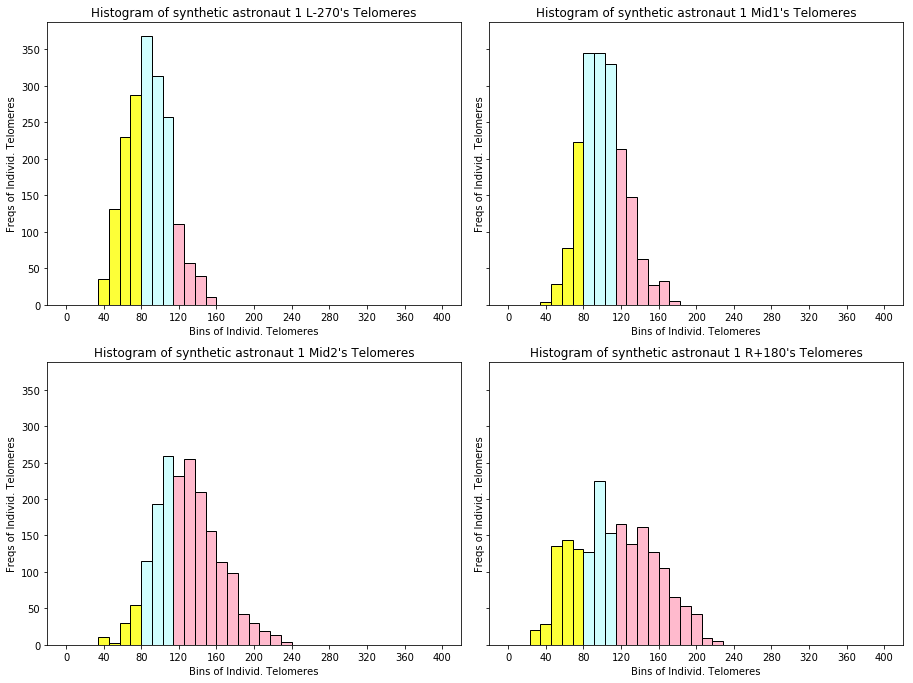

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


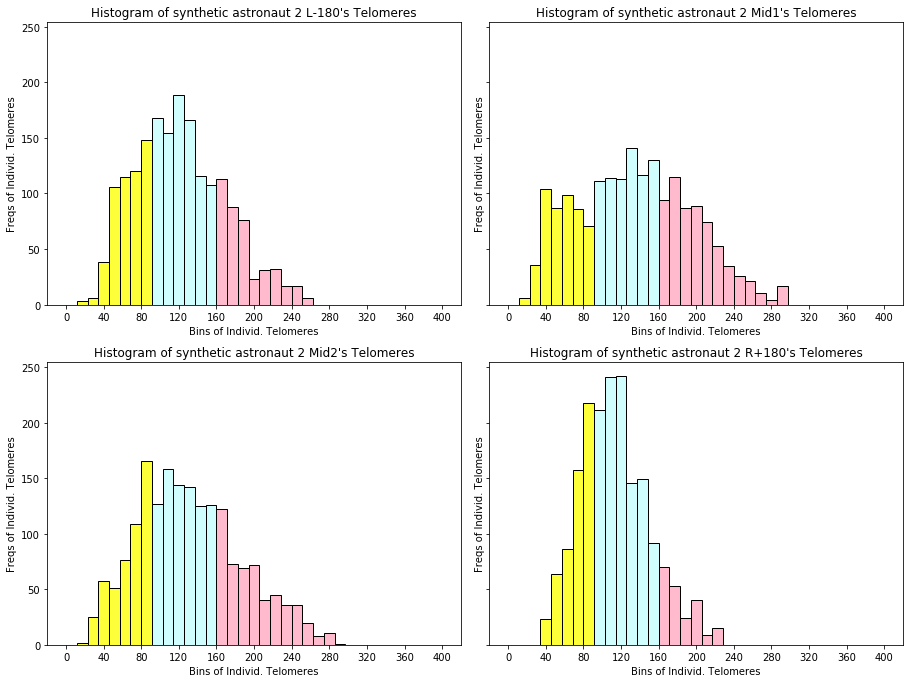

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


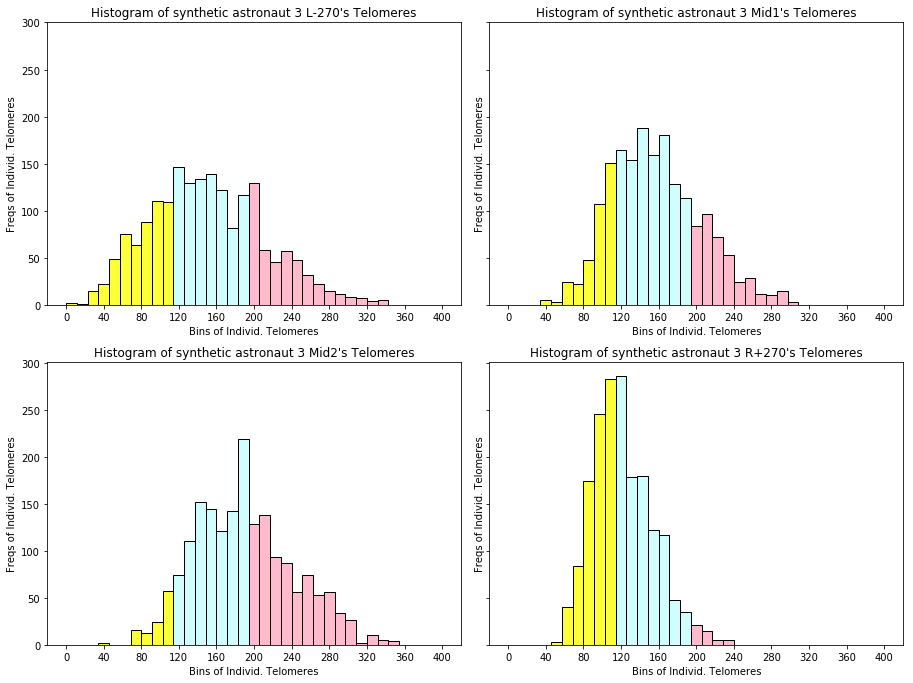

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


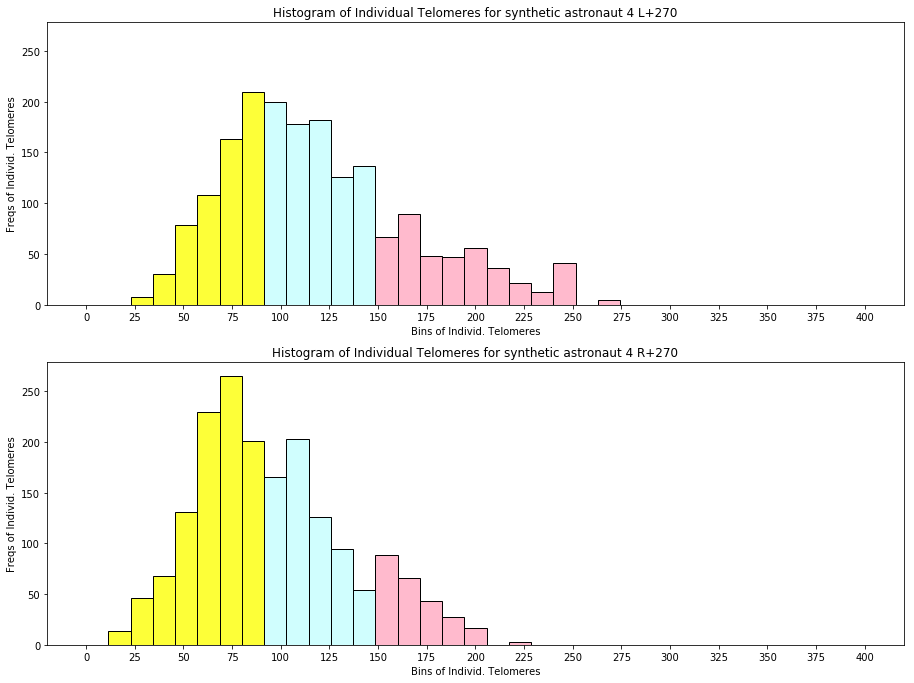

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


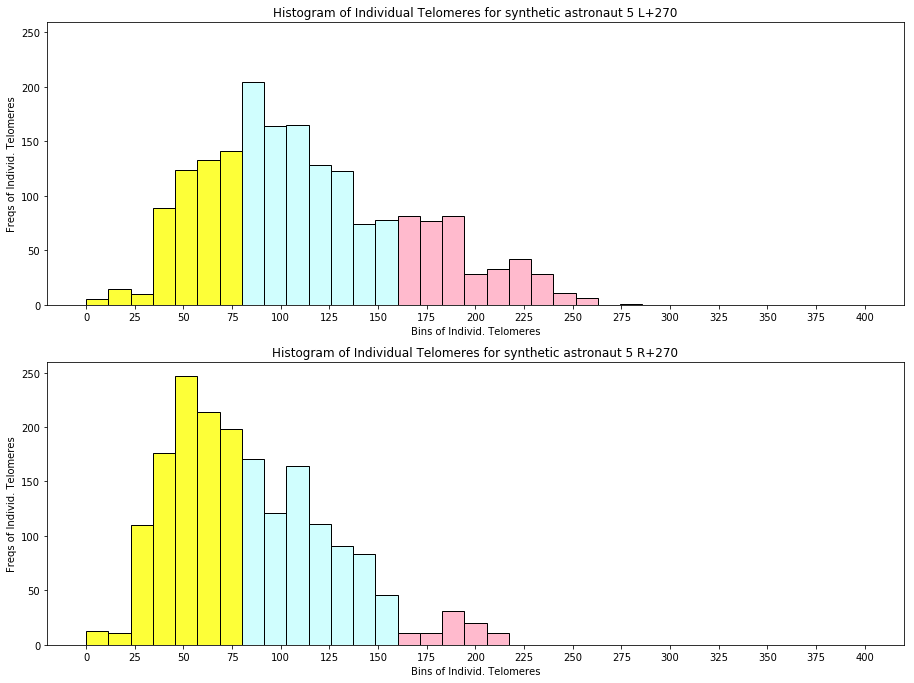

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


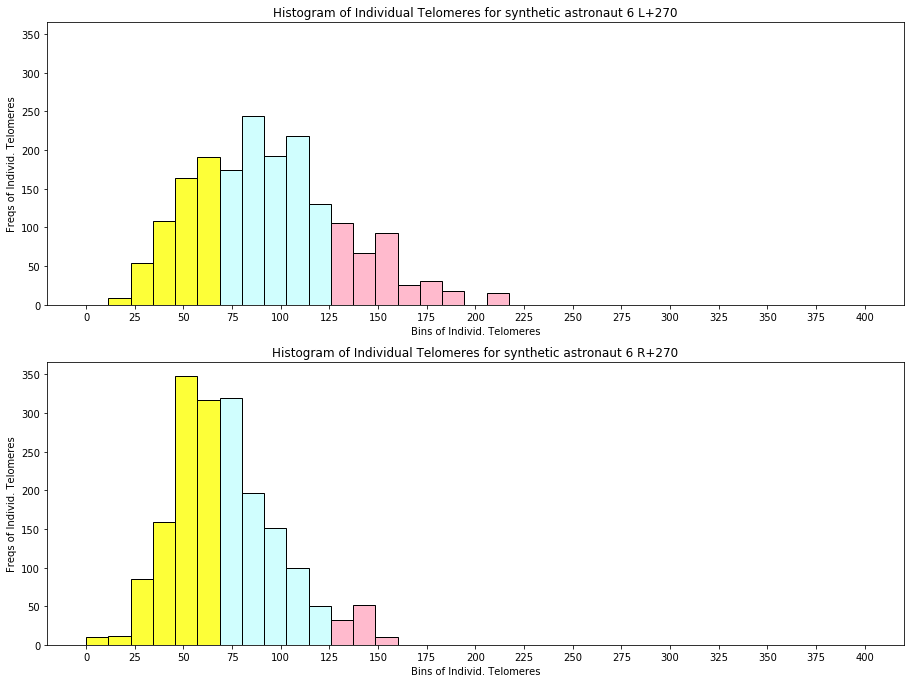

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


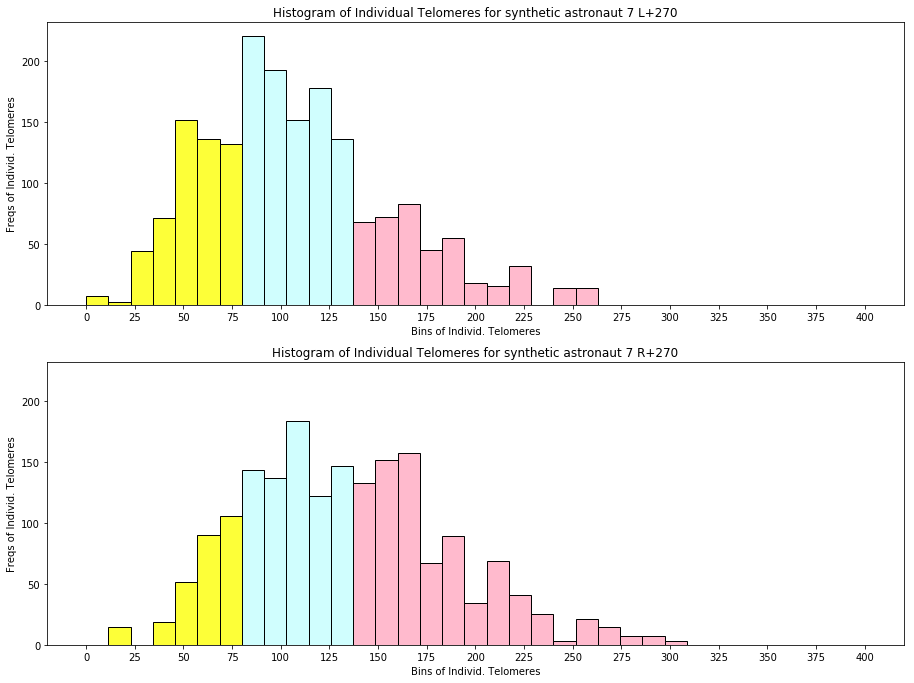

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


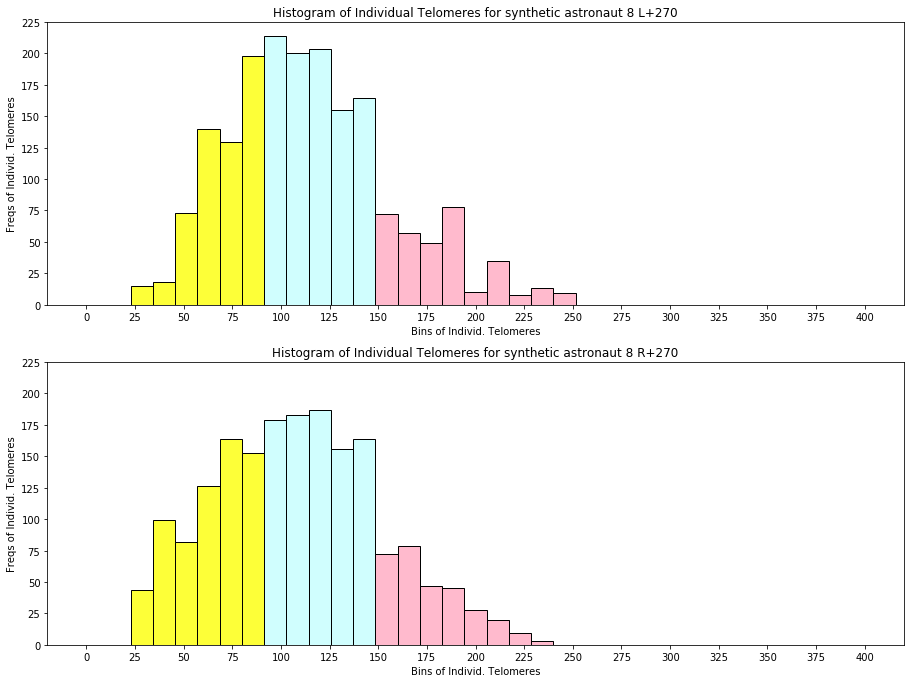

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


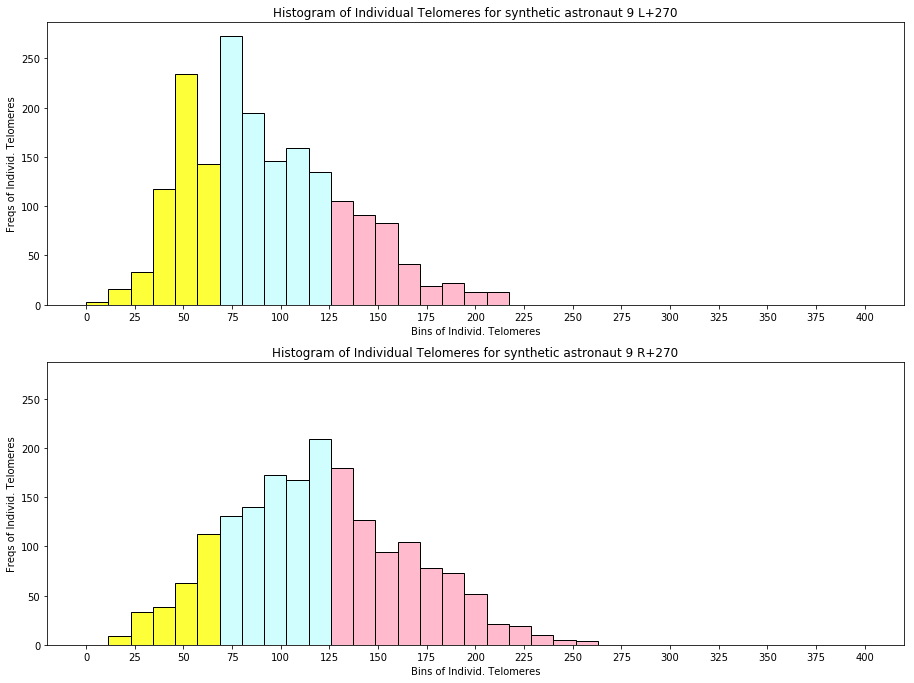

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


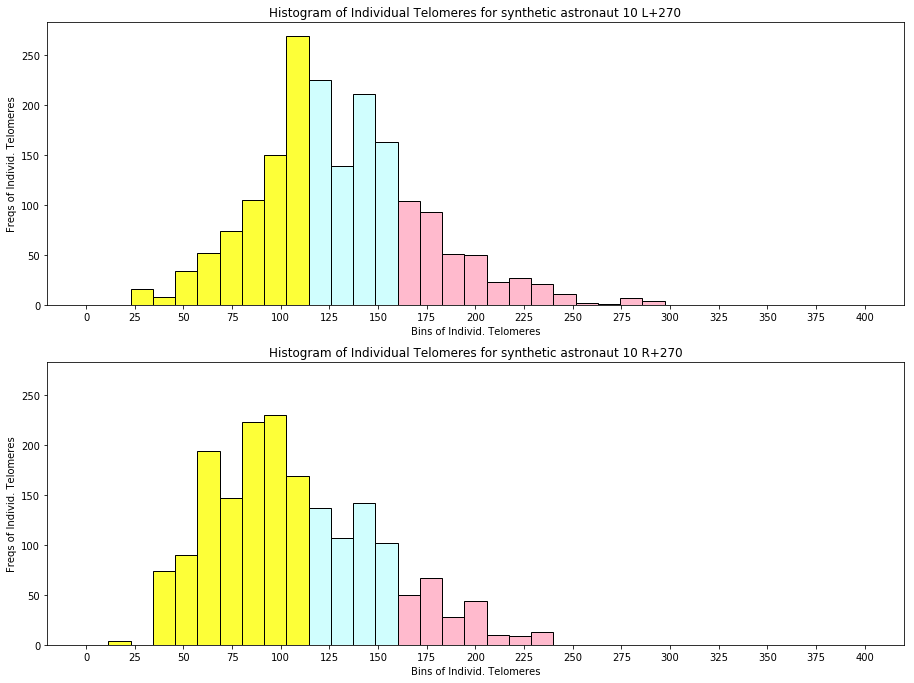

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


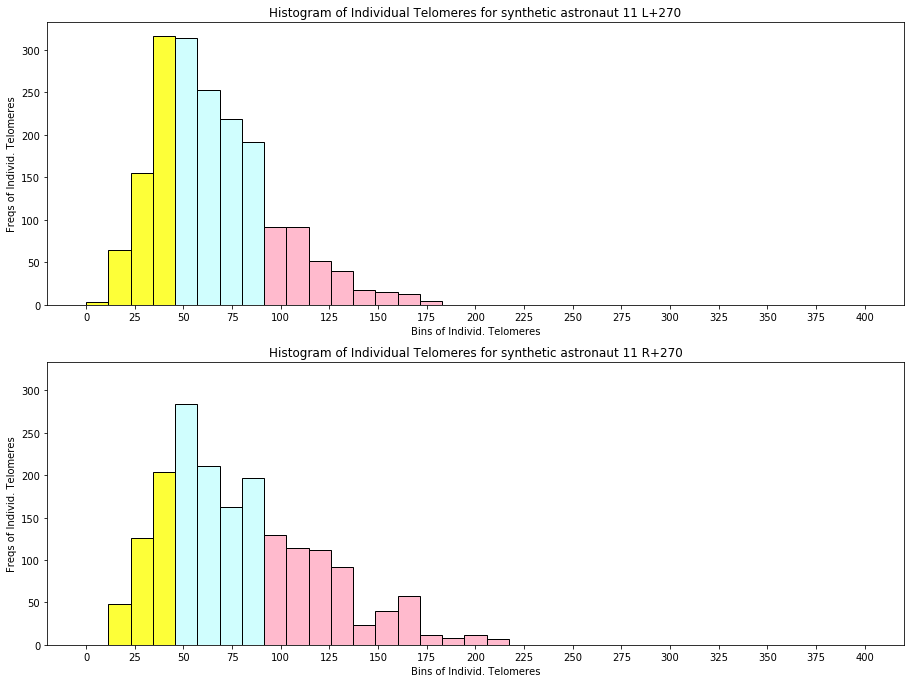

In [41]:
graphing_statistics_telomere_data(dict_astro_individ_telos_dfs)

<a id='conclusions'></a>
&nbsp; 
## Conclusions
**Highlights and Final Thoughts**  

...

&nbsp; 

In [26]:
def astronaut_histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astroDF, astroquartile, astroname, axsNUMone, axsNUMtwo):

        astroDF = astroDF.to_numpy()
        astroquartile = astroquartile.to_numpy()

        N, bins, patches = axs[axsNUMone,axsNUMtwo].hist(astroDF, bins=n_bins, range=(0, 400), edgecolor='black')

        for a in range(len(patches)):
            if bins[a] <= np.quantile(astroquartile, 0.25):
                patches[a].set_facecolor('#fdff38')

            elif np.quantile(astroquartile, 0.25) < bins[a] and bins[a] <= np.quantile(astroquartile, 0.50):
                patches[a].set_facecolor('#d0fefe')

            elif np.quantile(astroquartile, 0.50) < bins[a] and bins[a] <= np.quantile(astroquartile, 0.75):
                patches[a].set_facecolor('#d0fefe')

            elif bins[a] > np.quantile(astroquartile, 0.75): 
                patches[a].set_facecolor('#ffbacd')


        axs[axsNUMone,axsNUMtwo].set_title(f"Histogram of {astroname}'s Telomeres")
        axs[axsNUMone,axsNUMtwo].set_xlabel('Bins of Individ. Telomeres')
        axs[axsNUMone,axsNUMtwo].set_ylabel('Freqs of Individ. Telomeres')
        axs[axsNUMone,axsNUMtwo].xaxis.set_major_locator(plt.MaxNLocator(12))

In [27]:
def astronaut_histogram_stylizer_divyBins_byQuartile_2Stacked(fig, axs, n_bins, astroDF, astroquartile, astroname, axsNUMone):

    astroDF = astroDF.to_numpy()
    astroquartile = astroquartile.to_numpy()


    N, bins, patches = axs[axsNUMone].hist(astroDF, bins=n_bins, range=(0, 400), edgecolor='black')

    for a in range(len(patches)):
        if bins[a] <= np.quantile(astroquartile, 0.25):
            patches[a].set_facecolor('#fdff38')

        elif np.quantile(astroquartile, 0.25) < bins[a] and bins[a] <= np.quantile(astroquartile, 0.50):
            patches[a].set_facecolor('#d0fefe')

        elif np.quantile(astroquartile, 0.50) < bins[a] and bins[a] <= np.quantile(astroquartile, 0.75):
            patches[a].set_facecolor('#d0fefe')

        elif bins[a] > np.quantile(astroquartile, 0.75): 
            patches[a].set_facecolor('#ffbacd')


    axs[axsNUMone].set_title(f'Histogram of Individual Telomeres for {astroname}')
    axs[axsNUMone].set_xlabel('Bins of Individ. Telomeres')
    axs[axsNUMone].set_ylabel('Freqs of Individ. Telomeres')
    axs[axsNUMone].xaxis.set_major_locator(plt.MaxNLocator(19))

In [28]:
def gen_missing_values_andimpute_or_randomsampledown(n_cells, telosPercell, astro_df, option=None):

    if astro_df.size > 5520:
        astro_dfsampled = astro_df.sample(5520)
        return astro_dfsampled

    if astro_df.size > 25 and astro_df.size <= 2760:
        missing_data_difference = abs( (n_cells * telosPercell) - astro_df.size )
        rsampled = astro_df.sample(missing_data_difference, replace=True, random_state=28)
        concat_ed = pd.concat([rsampled, astro_df], sort=False)
        np.random.shuffle(concat_ed.to_numpy())
        return concat_ed

    if astro_df.size > 25 and astro_df.size < 5520:
        missing_data_difference = abs( (n_cells * telosPercell) - astro_df.size )

        if option == 'rsamp':
            rsampled = astro_df.sample(missing_data_difference, random_state=28)
            concat_ed = pd.concat([rsampled, astro_df], sort=False)

            np.random.shuffle(concat_ed.to_numpy())
            return concat_ed
        else:
            return astro_df

    else:
        return astro_df

In [29]:
def statistics_between_timepoints(astro_pre, astro_mid1, astro_mid2, astro_post, 
    astro_prename, astro_mid1name, astro_mid2name, astro_postname):

    print(astro_prename + '  compared vs  ' + astro_mid1name,
            stats.mannwhitneyu(astro_pre, astro_mid1), '\n\n\n',

            astro_prename + '  compared vs  ' + astro_mid2name,
            stats.mannwhitneyu(astro_pre, astro_mid2),'\n\n\n', 
            
            astro_mid1name + '  compared vs  ' + astro_postname,
            stats.mannwhitneyu(astro_mid1, astro_post),'\n\n\n', 

            astro_mid1name + '  compared vs  ' + astro_mid2name,
            stats.mannwhitneyu(astro_mid1, astro_mid2),'\n\n\n', 

            astro_mid2name + '  compared vs  ' + astro_postname,
            stats.mannwhitneyu(astro_mid2, astro_post),'\n\n\n', 

            astro_prename + '  compared vs  ' + astro_postname,
            stats.mannwhitneyu(astro_pre, astro_post),'\n\n\n', )


def statistics_between_timepoints_prepost_only(astro_pre, astro_post, astro_prename, astro_postname):

    print(astro_prename + '  compared vs  ' + astro_postname,
            stats.mannwhitneyu(astro_pre, astro_post),'\n\n\n', )